在前一章中，我们探索了一类具有简单分析和计算属性的回归模型。我们现在考虑用于解决分类问题类似的模型。在分类的中的目标是取一个输入向量$\mathbf{x}$，分配一个$K$个离散类别$\mathcal{C}_k$，其中$k=1,\cdots,K$。在大多数场景中，类别都是互不相交的，所以对于每个输入会分配一个，只有一个类别。输入空间被划分的决策区域的边界被称作决策边界，或决策平面。在本章中，我们考虑线性分类模型，这意味着决策平面是输入向量$\mathbf{x}$的线性组合，因此可以通过$(D-1)$维度的超平面来定义$D$维输入空间。数据集的类别可以很精确地被线性鞠策平面分开，这就说成是线性分离。

对于回归问题，目标变量$\mathbf{t}$是简单的实数值向量，是要预测的值。在分类问题中，有很多使用目标值表示类别标签的方法。对于概率模型，最方便的是，在二分类问题中，就是二进制表示，它由一个单目标变量$t \in \{0,1\}$，这个时候$t=1$表示的是类别$\mathcal{C}_1$，$t=0$表示的是类别$\mathcal{C}_2$。我可以将$t$值解释为概率，它的类别为$\mathcal{C}_1$，概率值只取极值0和1。对于$K>2$的类别，很方面使用1-of-K编码，$\mathbf{t}$是长度为$K$的向量，如果该类别是$\mathcal{C}_j$，那么$\mathbf{t}$中的所有元素$t_k$都是0，处理元素$t_j$，它的取值为1。比如，如果我们有$K=5$个类别，那么类别2的模式给出如下的目标向量

$$\mathbf{t} = \bigr(0,1,0,0,0\bigr)^{\mathsf{T}}$$

同样，我们可以将值$t_k$解释类别为$\mathcal{C}_k$的概率。对于非概率模型，目标变量表示的替代选择有时候会很方面。

在第一章，我们确定了三种不同方法的类别问题。最简单的方法是构造一个判别函数，直接将每个向量$\mathbf{x}$分配给一个特定类别。然而，一个更强大的方法就是在推理阶段对条件概率分布$p(\mathcal{C}_k\mid\mathbf{x})$进行建模，然后使用这个分布做出最佳决策。正如1.5.4讨论的，通过分离推断和决策，我们获得了很多益处。有两种不同的方法定义条件概率$p(\mathcal{C}_k\mid\mathbf{x})$。一种方法就是直接建模，比如，通过参数化模型表示，然后使用训练集优化参数。取而代之的，我们可以采用一个通用的方法，就是建模由$p(\mathbf{x}\mid\mathcal{C}_k)$给出的条件概率魔都，协同类别先验概率$p(\mathcal{C}_k)$，然后使用贝叶斯定义计算需要的后验概率

$$p(\mathcal{C}_k\mid\mathbf{x}) = \frac{p(\mathbf{x}\mid\mathcal{C}_k)p(\mathcal{C}_k)}{p(\mathbf{x})}$$

在本章我们会讨论所有三种方法的例子。

考虑第三章中的线性回归模型，模型预测$y(\mathbf{x},\mathbf{w})$是由参数为$\mathbf{w}$的线性函数给出的。在最简单例子中，模型在输入变量中依然是线性的，因此取形式$y(\mathbf{x})=\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0$，所以$y$是一个实数。对于分类问题，我们希望预测离散类别标签，或更一般地位于范围内$(0,1)$的后验概率。为了实现这个，我们考虑这个模型的推广，我们使用非线性函数$f(\cdot)$来变换$\mathbf{w}$的线性函数

$$y(\mathbf{x}) = f(\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0)$$

在机器学习$f(\cdot)$中，它就是激活函数，而它的逆在统计学中称作链接函数。决策平面相应的是$y(\mathbf{x}) = \text{const}$，所以$\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0 = \text{const}$，因此决策平面是$\mathbf{x}$的线性函数，即使函数$f(\cdot)$是非线性的。基于这点，4.3描述的类别模型被称作广义线性模型（McCullagh和Nelder，1989年）。注意，即跟回归使用的模型相比，由于非线性函数$f(\cdot)$的存在，它们在参数中已不再是线性。它们要比线性回归模型，有更加复杂的分析和计算特性。尽管如此，这些模型相比后续章节要研究的更一般的非线性模型，还是相当简单的。

就像我们在第三章中对回归模型所做的那样，如果我们先使用基函数$\phi(\mathbf{x})$的向量对输入变量进行固定非线性变换，本章讨论的算法同样适用。

#### 4.1 判别函数

判别函数是取以输入向量$\mathbf{x}$，分配类别1-of-K，记作$\mathcal{C}_k$。在本章，我们将限制于线性判别，它们的决策平面一般是超平面。为了简化讨论，我们先考虑二分类的例子，然后再扩展到$K > 2$的类别。

#### 4.1.1 二分类

线性判别函数的最简单表示就是通过取一个输入项链的线性函数得到的

$$y(\mathbf{x})=\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0$$

其中$\mathbf{w}$被称作权重向量，$w_0$是偏置（不要与统计中的变差相混淆）。负偏置有时候被称作阈值。如果$y(\mathbf{x}) \ge 0$，输入向量$\mathbf{x}$就被分配类别$\mathcal{C}_1$，否则就是类别$\mathcal{C}_2$。其相应的决策边界是由$y(\mathbf{x})=0$定义的，在$D$维输入空间中对应的$D-1$维度的超平面。考虑在决策平面上的两个点$\mathbf{x}_A$和$\mathbf{x}_B$。因为$y(\mathbf{x}_A)=y(\mathbf{x}_B)=0$，我们有$\mathbf{w}^{\mathsf{T}}(\mathbf{x}_A-\mathbf{x}_B)=0$，因此向量$\mathbf{w}$正交于在决策平面内的每个向量，因此$\mathbf{w}$定义了决策平面的方向。类似地，如果$\mathbf{x}$是决策平面上的点，那么$y(\mathbf{x})=0$，所以从原点到决策平面上的距离给出如下

$$\frac{\mathbf{w}^{\mathsf{T}}\mathbf{x}}{\|\mathbf{w}\|} = -\frac{w_0}{\|\mathbf{w}\|}$$

因此，我们看到偏置参数$w_0$定义了决策平面的位置。图中4.1中$D=2$的例子中绘画出了这些性质。

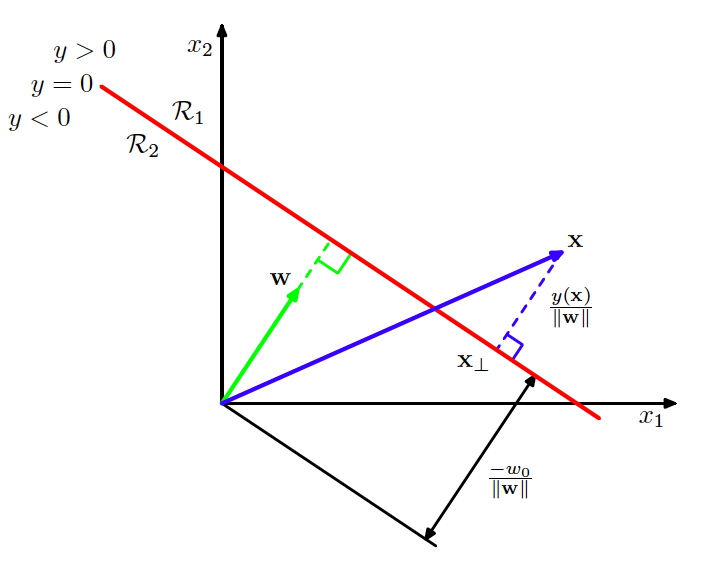

<center>图4.1 图中画的是二维线性判别函数的几何图例。如图红色显示的绝平面，垂直于参数$\mathbf{w}$，它从原点的位置是由偏置参数$w_0$控制的，同时，一般点$\mathbf{x}$与决策平面的正交距离由$y(\mathbf{x})/\|\mathbf{w}\|$给出。</center>

此外，我们注意到$y(\mathbf{x})$的值给出一个从点$\mathbf{x}$到决策平面的垂直距离$r$的符号度量。为了弄明白这个，我们考虑任一点$\mathbf{x}$，让$\mathbf{x}_{\perp}$为在决策平面上的正交投影，所以有

$$\mathbf{x} = \mathbf{x}_{\perp} + r\frac{\mathbf{w}}{\|\mathbf{w}\|}$$

两边乘以$\mathbf{w}_{\mathsf{T}}$，并加上$w_0$，使用$y(\mathbf{x})=\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0$和$y(\mathbf{x}_{\perp})=\mathbf{w}^{\mathsf{T}}\mathbf{x}_{\perp} + w_0$，我们有

$$r = \frac{y(\mathbf{x})}{\|\mathbf{w}\|}$$

结果如图4.1所示。

正如第三章中的线性回归模型，有时为了方便会使用更紧凑的符号来介绍额外的输入值$x_0$，那么定义$\tilde{\mathbf{w}}=(w_0,\mathbf{w})$和$\tilde{\mathbf{x}}=(x_0,\mathbf{x})$，所以有

$$y(\mathbf{x}) = \tilde{\mathbf{w}}^{\mathsf{T}}\tilde{\mathbf{x}}$$

在本例中，决策平面是$D$维经过原点的$D+1$扩展的输入空间的超平面。

#### 4.1.2 多分类

现在考虑线性判别的扩展$K>2$个类别。我们可能会被诱导着通过组合多个二分类判别函数来创建一个$K$类别判别。然而，这其实是很困难的（Duda和Hart，1973年）如现在我们显示的。

考虑使用$K-1$分类器，每个都是用一个解决二分类问题：将特定类别$\mathcal{C}_k$中的点与其它不是在这个类别中的点区分开。这是一个one vs rest分类器。图4.2中的左边部分的例子展示了一个包含三个类别的例子，这种方法导致输入空间的区域被模糊分类。

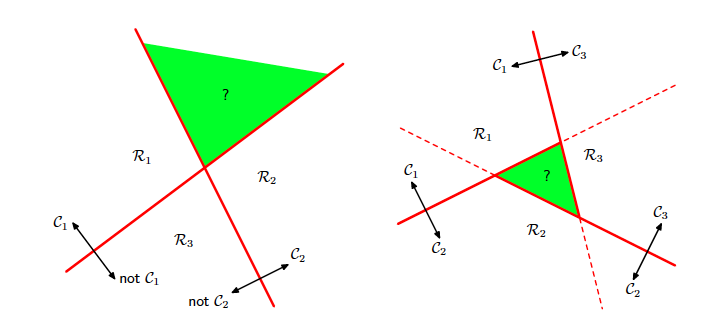

<center>图4.2 尝试从一个二分类判别集合中构建一个$K$类别的判别，实会导致模糊区域的产生的，如图绿色显示。左边的例子包含二个判别器的使用用来区分在$\mathcal{C}_k$中的点，和不在$\mathcal{C}_k$中的点。右边例子是包含三个判别函数，每个被用来区分$\mathcal{C}_k$和$\mathcal{C}_j$类别对。</center>

另一种方法是引入$K(K-1)/2$二进制判别函数，一对每个可能的类别对。这被称为one vs one分类器。每个点是根据这些判别函数中的大多胡搜投票来分类的。但，如图4.2所示这还是会产生模糊区域的问题。

我们可以通过考虑由$K$个线性函数组成的单个$K$类别判别形式来避免这些难点

$$y_k(\mathbf{x})=\mathbf{w}_k^{\mathsf{T}}\mathbf{x}+w_{k0}$$

那么分配一个点$\mathbf{x}$到类别$\mathcal{C}_k$，如果对于所有的$j≠k$，$y_k(\mathbf{x}) > y_j(\mathbf{x})$。在类别$\mathcal{C}_k$和$\mathcal{C}_j$之间的决策边界，因而是由$y_k(\mathbf{x})=y_j(\mathbf{x})$给出的，因此相应的$(D-1)$维超平面定义如下

$$(\mathbf{w}_k - \mathbf{w}_j)^{\mathsf{T}}\mathbf{x} + (w_{k0} - w_{j0}) = 0$$

这与4.1.1节中讨论的两类情形的决策边界具有相同的形式，因此适用于类似的几何性质。

这种判别式的决策区域总是单独连通和凸的。为了弄明白这个，考虑两个都在决策区域$\mathcal{R}_k$上的点$\mathbf{x}_A$和$\mathbf{x}_B$，如图4.3所示。任何点$\hat{\mathbf{x}}$都是可以由$\mathbf{x}_A$和$\mathbf{x}_B$两点的连线来表示

$$\hat{\mathbf{x}} = \lambda\mathbf{x}_A + (1-\lambda)\mathbf{x}_B$$

其中$0 \le \lambda \le 1$。对于线性判别函数，有如下

$$y_k(\hat{\mathbf{x}}) = \lambda y_k(\mathbf{x}_A) + (1-\lambda)y_k(\mathbf{x}_A) + (1-\lambda)y_k(\mathbf{x}_B)$$

因为$\mathbf{x}_A$和$\mathbf{x}_B$都是在$\mathcal{R}_k$，它遵循$y_k(\mathbf{x}_A) > y_j(\mathbf{x}_A)$，和$y_k(\mathbf{x}_B) > y_j(\mathbf{x}_B)$，对于所有$j ≠ k$，因此$y_k(\hat{\mathbf{x}}) > y_j(\hat{\mathbf{x}})$，所以$\hat{\mathbf{x}}$也会在$\mathcal{R}_k$内。因此$\mathcal{R}_k$是单连通且是凸的。

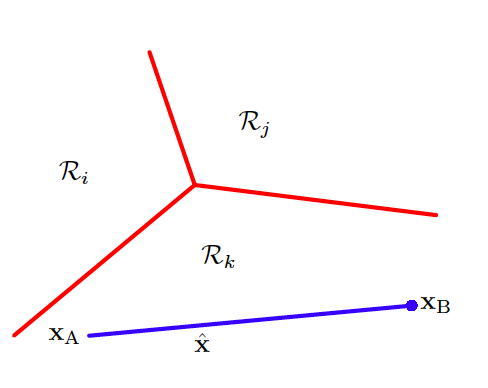

<center>图4.3 图中画的是多分类线性判别的决策区域，在决策边界内显示的是红色。如果两个点在同一个决策区域$\mathcal{R}_k$内，那么由这两点连接成的直线上的任何点$\hat{\mathbf{x}}$也都在区域$\mathcal{R}_k$上，因此决策区域应该是单连通且是凸的。</center>

需要注意的是对于二分类，我们可以讨论这里使用的形式，基于两个判别函数$y_1(\mathbf{x}_1)$和$y_2(\mathbf{x}_2)$，要么使用在4.1.1节中描述的基于但判别函数$y(\mathbf{x})$等价简单型。

我们现在可以探索三种学习线性判别函数参数的方法，基于最小二乘，Fisher线性判别和感知机算法。

#### 4.1.3 分类的最小二乘

在第三章，我们考虑的模型是参数的线性函数，我们看到误差函数的最小平方和会得到参数值的简单闭合解。因此，我们很想看看我们是否可以用同样的形式来处理分类问题。考虑一个通用的$K$分类问题，对目标向量$\mathbf{t}$采用1-of-K编码方案。在这样的上下文中使用最小二乘的一个理由是，它给出近似输入向量的目标值的条件期望$\mathbb{E}[\mathbf{t} \mid \mathbf{x}]$。对于二进制编码方案，条件期望是由后验类咖喱向量给出的。不幸的是，尽管，这些概率的一般进度都相当差，实际上近似的值都是在$(0,1)$之外的，等会儿我们会看到线性模型的灵活性限制。

每个类$\mathcal{C}_k$被描述成如下线性模型

$$y_k(\mathbf{x}) = \mathbf{w}_k^{\mathsf{T}}\mathbf{x} + w_{k0}$$

其中$k=1,\cdots,K$。我们可以将这些这些向量符号组合在一起

$$y(\mathbf{x}) = \mathbf{\widetilde{W}}^{\mathsf{T}}\mathbf{\widetilde{x}}$$

其中$\mathbf{\widetilde{W}}$是一个矩阵，它的第$k$列是由$D+1$维向量$\tilde{w}_k=(w_{k0},\mathbf{w}_k^{\mathsf{T}})^{\mathsf{T}}$组成，$\mathbf{\widetilde{x}}$是一个对应的带有输入$x_0=1$的增广输入向量$(1,\mathbf{x}^{\mathsf{T}})^{\mathsf{T}}$。这个表示已经在第3.1节详细讨论过。一个新输入$\mathbf{x}$会被分配的输出$y_k=\mathbf{\widetilde{w}}^{\mathsf{T}}\mathbf{\widetilde{x}}$是最大的类别。